### Analyzing the Time Performance of Bubble, Insertion, and Selection Sort.
The data consists of the following columns:
- `SortType` - The algorithm used to sort the data (bubble sort, selection sort, insertion sort).
- `ArrayType` - The order the integers in the array prior to sorting.
    - `Random` - The integers in the array were in random order.
    - `Increasing` - The integers in the array were in ascending order.
    - `IncreasingAndRandom` - 90% of the integers were in ascending order while 10% were in random order.
    - `Decreasing` - The integers in the array were in descending order.
    - `Equal` - The integers in the array were all the same.
- `ArraySize` - The size of the array.
    - `10000` - The array contained 10,000 integers.
    - `25000` - The array contained 25,000 integers.
    - `50000` - The array contained 50,000 integers.
    - `100000` - The array contained 100,000 integers.
- `Test`# - The time it took in milliseconds to sort the array.
- `AverageTime` - The average of all all the test times in milliseconds.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

Increase the display size of all graphs by `factor`.

In [2]:
factor = 1.2
mpl.rcParams['figure.dpi'] = mpl.rcParamsDefault['figure.dpi'] * factor

Set the color style for all displayed graphs. Run `plt.style.available` for a list of styles.

In [3]:
plt.style.use(["dark_background"])

## The data
Each row represents a set of nine tests and their average time in milliseconds.

In [4]:
tests = pd.read_csv("data/sort_tests.csv")

In [5]:
tests

,SortType,ArrayType,ArraySize,Test1,Test2,Test3,Test4,Test5,Test6,Test7,Test8,Test9,AverageTime
0,BubbleSort,Equal,10000,2.100887,1.816844,1.734940,1.653783,1.620458,1.646332,1.654642,1.675758,0.395732,1.588819
1,BubbleSort,Equal,25000,0.344438,0.342302,0.340168,0.341084,0.273704,0.343259,0.340629,0.346424,0.286490,0.328722
2,BubbleSort,Equal,50000,0.669300,0.714362,0.750050,0.751582,0.724130,0.845181,0.480185,0.509878,0.512997,0.661962
3,BubbleSort,Equal,100000,0.983173,0.811248,0.910891,0.922530,0.944618,0.962387,0.922943,1.047562,0.937066,0.938046
4,BubbleSort,Random,10000,1423.721529,1615.646777,1636.998131,1733.617812,1699.408568,1608.589898,1640.827512,1584.911188,1805.414216,1638.792847
5,BubbleSort,Random,25000,17820.525435,14897.161279,14086.136214,12153.546143,13017.104881,16598.033997,16510.642676,15338.869148,17002.808605,15269.425375
6,BubbleSort,Random,50000,92502.936111,72313.872971,60330.164272,66429.312906,66336.374407,62790.397230,67761.572618,66051.570752,63835.811092,68705.779151
7,BubbleSort,Random,100000,267902.873662,330858.314055,351393.330513,356742.938208,381057.021634,385180.364030,374069.504284,344426.077008,371334.521629,351440.549447
8,BubbleSort,Increasing,10000,0.120689,0.142236,0.168250,0.139213,0.133302,0.125839,0.138850,0.139291,0.142248,0.138879
9,BubbleSort,Increasing,25000,0.352865,0.260573,0.353962,0.307230,0.354571,0.339063,0.341304,0.345099,0.384553,0.337691


In [6]:
tests.describe()

,ArraySize,Test1,Test2,Test3,Test4,Test5,Test6,Test7,Test8,Test9,AverageTime
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,46250.000000,23402.071630,22785.745582,22717.114273,23136.965622,23118.912039,23220.760312,22832.183811,21940.164668,22799.304269,22883.691356
std,34452.435893,63449.903029,63330.182973,64139.489020,66886.532417,67734.853501,66751.217779,63955.963504,60796.917439,65428.171212,64444.399164
min,10000.000000,0.120689,0.142236,0.168250,0.139213,0.133302,0.125839,0.138850,0.139291,0.142248,0.138879
25%,21250.000000,2.509009,2.467614,2.444752,13.752961,2.422738,2.441450,2.355755,2.044852,2.197211,3.378001
50%,37500.000000,998.223356,1063.936743,1101.318654,1076.193540,1090.848252,1100.990251,1042.135876,1112.310984,1036.553635,1092.621922
75%,62500.000000,12607.106834,15058.167460,13233.558376,12467.472142,12738.425218,12699.606232,14383.724050,14027.156869,13968.528501,13850.283107
max,100000.000000,330836.289871,330858.314055,351393.330513,356742.938208,381057.021634,385180.364030,374069.504284,344426.077008,371334.521629,351440.549447


In [7]:
tests.describe(include = ["O"])

,SortType,ArrayType
count,60,60
unique,3,5
top,BubbleSort,Equal
freq,20,12


## Accessing the data

- What is the structure or shape of the data?
    - **The data is tabular (or rectangular). The sort and array type columns are qualitative while the remaining columns are quantitative.**
    - **The the average time column and the sequential test time columns are continuous while the array size is discrete.**

- What is the granularity of the data?
    - **The granularity of the data is that each row is a set of nine tests. Additionally, each row is a set of unique tests for each sort type, array type, and array size combination. The data is coarsed-grained because each numbered test time column can be listed individually. However, for the purpose of this project, the average of the test times is the variable of interest.**

- What is the scope and completeness of the data?
    - **The goal of the project is to analyze and compare the time performance of three sorting algorithms with different ordered data. The data consists of six possible ways a data structure could be ordered: random, ascending, descending, equal, and mostly ascending. Each test (row) is a set of nine test times and their average. Hence, the data is within the scope of project's goal and sufficient to examine the time performance of each respective algorithm.**
    
- What is the temporality of the data, or how does the data relate to time?
    - **The results of the tests were recorded and written to a CSV formatted file on the day this project was published.**
    - **It is also worth mentioning that time does not have a significant impact on the data. This is because the data describes general trends in the time performance of these three algorithms when sorting data in different order, as opposed to their performance for specific use case scenarios. Thus, unless a major breakthrough occurs in computer science, the general trends described by the data is true even as more power computers are created.**

- What is the faithfulness of the data, or how well does the data capture reality?
    - **There are no problems with the faithfulness of the data. The data does not contain: outliers, missing or unrealistic values, misspellings or falsified results. Additionally, the data tries to capture the reality by describing general trends in the time performance of the three sorting algorithms with different ordered data. In reality, the time performance may be different, but given some degree of variation, the shape of the graphs should look similar in real life scenarios. Anyone is free to try to reproduce the results observed in this project. The source code is freely available on GitHub.**

- a) If necessary, clean your data (ex. handle missing and erroneous data, remove extra characters in quantitative data columns, etc).  As you explore your data in later steps, you may realize additional cleaning needs to be done.  If so, just come back and update this step.
- b) Describe what steps (if any) you took to clean your data on your webpage.  In particular, even if you did not need to clean your data, you must still state this on your webpage for full credit.
    - **Since the tests results were formatted specifically for this project, the data does not need cleaning.**

None of your plots are single variables plots. They all use at least two columns (variables). 

An example of a single variable plot would be a histogram of the average column, say. You could also create a new dataframe that is in the "long" format (instead of wide), so each test has its own row. Then you could filter the dataframe to only have bubblesort tests, for example, and plot the distribution of their times.

See detailed notes above, but your plots are all two-variable. I would like to see at least two single variable plots to see that you understand the concept, and then will count two of your other plots towards this step. 

The extra two plots can be used in milestone 3 in the "your choice" step. I will regrade this milestone with milestone 2. Just let me know what is new/fixed when submitting milestone 2.

### Lowest and highest time averages.
The rows with the best and worse time averages.

In [8]:
columns = ["SortType", "ArrayType", "ArraySize", "AverageTime"]

In [9]:
# best time
tests.iloc[tests["AverageTime"].idxmin()][columns]

SortType       BubbleSort
ArrayType      Increasing
ArraySize           10000
AverageTime      0.138879
Name: 8, dtype: object

In [10]:
# worst time
tests.iloc[tests["AverageTime"].idxmax()][columns]

SortType          BubbleSort
ArrayType             Random
ArraySize             100000
AverageTime    351440.549447
Name: 7, dtype: object

### Best Overall Performance
By taking the the mean of all the averages, it is possible to find which algorithm had the best overall performance.

In [11]:
tests.groupby("SortType").mean()["AverageTime"]

SortType
BubbleSort       54326.305677
InsertionSort     5574.331951
SelectionSort     8750.436439
Name: AverageTime, dtype: float64

**What does this data mean?**

Bubble sort had the worse overall time performance while insertion sort performed the best across the board given a variety of array types. Although, selection sort had the highest time performance, its performance is comparable to insertion sort.

### Visual Analysis

This function definition facilitates plotting bar charts of the data.

In [12]:
"""
param:
    group - variable to display on the vertical axis
"""
def plot_average_time_chart(df, grouping):
    means_of_groups = df.groupby(grouping).mean()
    c = ["royalblue", "tab:blue", "orange", "green", "red", "purple", "cornflowerblue"]
    means_of_groups["AverageTime"].plot(kind = "barh", color = c)
    plt.annotate("Lower is better", xy = (1.0, -0.2), xycoords = "axes fraction",
                 ha = "right", va = "center", fontsize = 10)

#### Single Variable Analysis

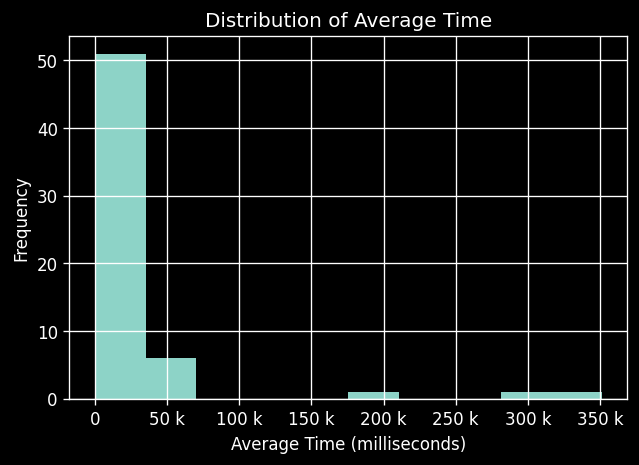

In [13]:
tests["AverageTime"].hist()
plt.title("Distribution of Average Time")
plt.xlabel("Average Time (milliseconds)")
plt.ylabel("Frequency")
plt.gca().xaxis.set_major_formatter(mpl.ticker.EngFormatter()) # format ticks into standard units

#### Long format
Converting the data from the wide format to the long format to plot the distribution of the individual test times.

In [14]:
cols_to_rows = ["Test1", "Test2", "Test3", "Test4", "Test5", "Test6", "Test7", "Test8", "Test9"]
tests_long = pd.melt(tests, id_vars = ["SortType"], value_vars = cols_to_rows)

In [15]:
tests_long_bubble = tests_long[(tests_long["SortType"] == "BubbleSort")]
tests_long_insertion = tests_long[(tests_long["SortType"] == "InsertionSort")]
tests_long_selection = tests_long[(tests_long["SortType"] == "SelectionSort")]

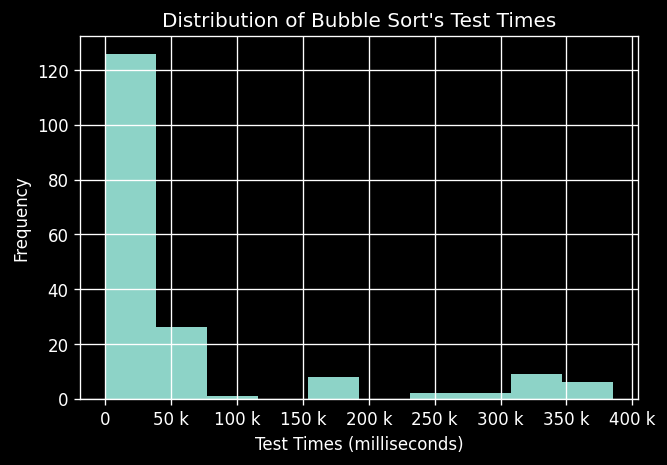

In [16]:
tests_long_bubble.hist()
plt.title("Distribution of Bubble Sort's Test Times")
plt.xlabel("Test Times (milliseconds)")
plt.ylabel("Frequency")
plt.gca().xaxis.set_major_formatter(mpl.ticker.EngFormatter()) # format ticks into standard units

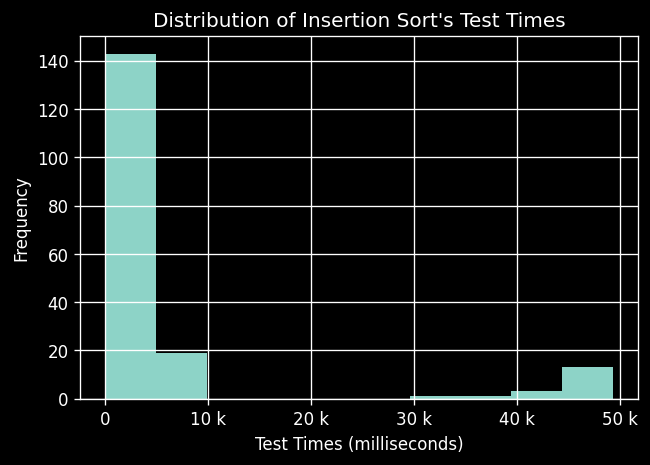

In [17]:
tests_long_insertion.hist()
plt.title("Distribution of Insertion Sort's Test Times")
plt.xlabel("Test Times (milliseconds)")
plt.ylabel("Frequency")
plt.gca().xaxis.set_major_formatter(mpl.ticker.EngFormatter()) # format ticks into standard units

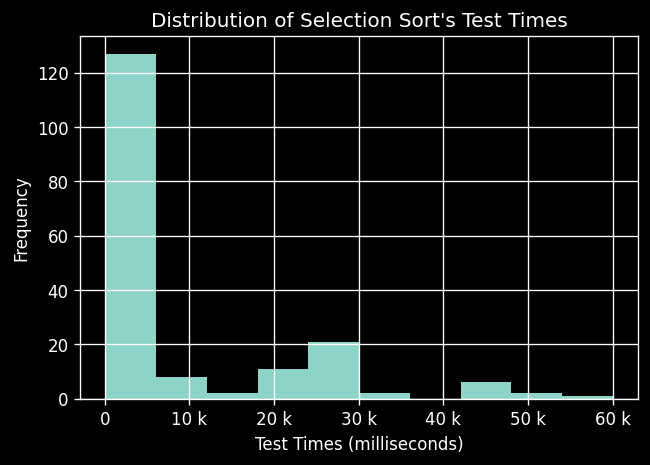

In [18]:
tests_long_selection.hist()
plt.title("Distribution of Selection Sort's Test Times")
plt.xlabel("Test Times (milliseconds)")
plt.ylabel("Frequency")
plt.gca().xaxis.set_major_formatter(mpl.ticker.EngFormatter()) # format ticks into standard units

#### Line plots

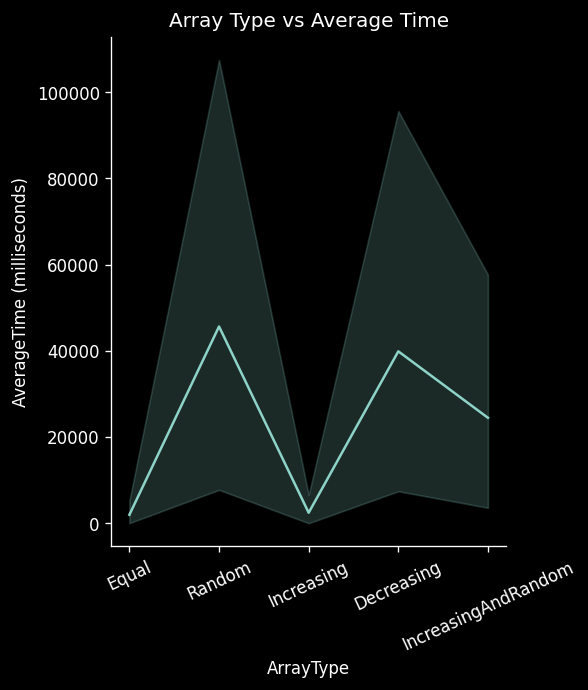

<Figure size 720x480 with 0 Axes>

In [19]:
sns.relplot(x = "ArrayType", y = "AverageTime", kind = "line", data = tests)
plt.title("Array Type vs Average Time")
plt.ylabel("AverageTime (milliseconds)")
plt.xticks(rotation = 25)
plt.figure().align_xlabels()
plt.show()

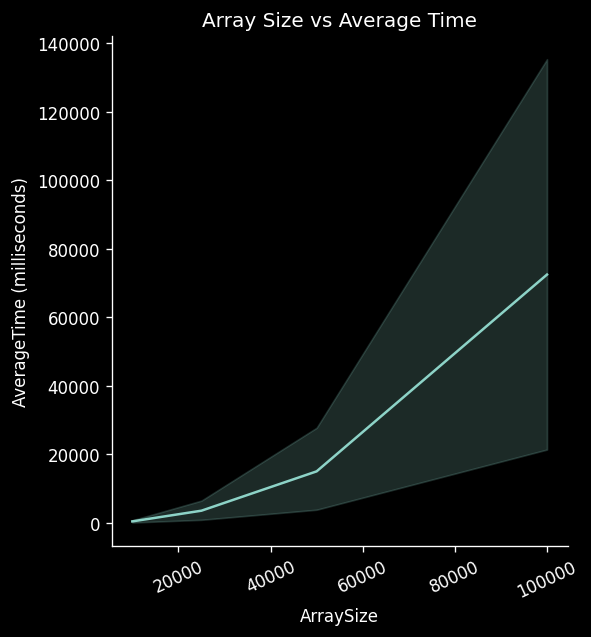

<Figure size 720x480 with 0 Axes>

In [20]:
sns.relplot(x = "ArraySize", y = "AverageTime", kind = "line", data = tests)
plt.title("Array Size vs Average Time")
plt.ylabel("AverageTime (milliseconds)")
plt.xticks(rotation = 25)
plt.figure().align_xlabels()
plt.show()

As illustrated by the line plots, the time performance of the sorting algorithms is heavily affected by the order of the data. The line shadow represents the confidence interval or the range of values by which the average time may vary on subsequent tests. This project explores ways to take advantage of the confidence interval  and the variability of the test average test time get lower average times. As demonstrated by the plot, the variability is higher for random and decreasing array types because these data orders represents the worse case scenario of sorting algorithms. Also, since the relationship of the average time and the array size is quadratic, the variability is also quadratic, which means the confidence interval is lower. This data can be used to capitalize on the window for variation by taking advantage of the strengths each respective algorithm has to offer to yield lower average times.



#### Average Time

Text(0.5, 0, 'Average Time (milliseconds)')

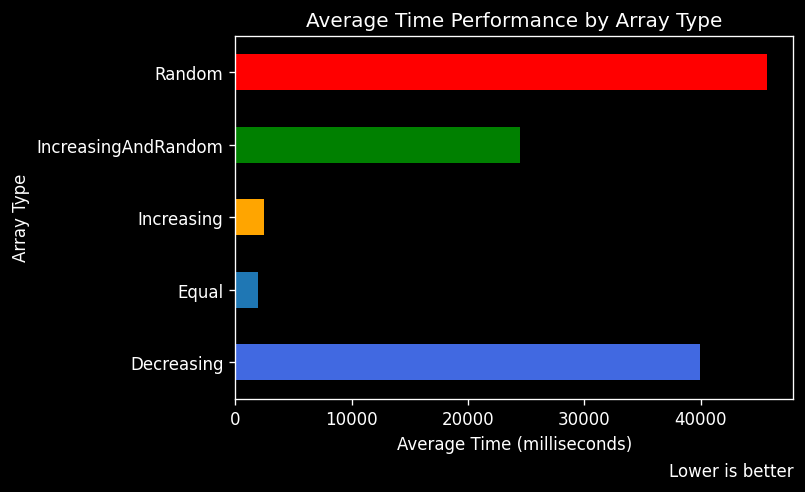

In [21]:
plot_average_time_chart(tests, "ArrayType")
plt.title("Average Time Performance by Array Type")
plt.ylabel("Array Type")
plt.xlabel("Average Time (milliseconds)")

The bar chart shows the average time performance of the algorithms with different ordered data. As expected, all the algorithms performed well with arrays in equal and increasing orders as they were already in sorted order.

It is worth noting that random array types have the worse average time by a few hundreds milliseconds. The algorithms sorted the arrays in ascending order, as such, descending array type was the worse case scenario because the algorithms had to swap every element, thus executing the maximum number of operations. The bar chart shows surprising results because in a random ordered array, on average, one would expect most elements to be out of order but there should be at least some elements in the right order. Hence, I was expecting the random and decreasing bars in the chart to be trading places.

However, on closer inspection, my implementation of the decreasing array type used a for-loop to decrement an initial random value by one for array size number of times. Hence, the array was in sequential descending order. I suspect this is the reason for the unexpected results because although the sorting algorithms swapped every element, the sequential aspect meant that for every iteration, the number of comparisons was linear. There is no such pattern for the random array types.

Text(0.5, 0, 'Average Time (milliseconds)')

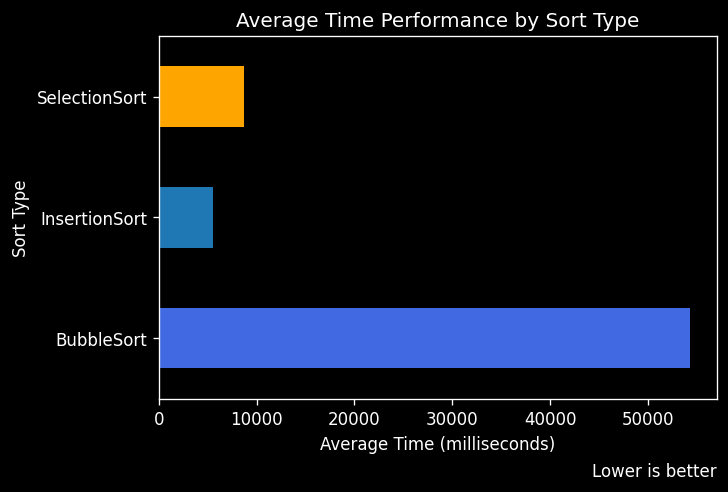

In [22]:
plot_average_time_chart(tests, "SortType")
plt.title("Average Time Performance by Sort Type")
plt.ylabel("Sort Type")
plt.xlabel("Average Time (milliseconds)")

The approach employed by selection and insertion sort performed approximately 6 to 7 times better than bubble sort when sorting data arranged in various orders in this particular case.


In [23]:
bubble = tests[(tests["SortType"] == "BubbleSort")]
insertion = tests[(tests["SortType"] == "InsertionSort")]
selection = tests[(tests["SortType"] == "SelectionSort")]

Text(0.5, 0, 'Average Time (milliseconds)')

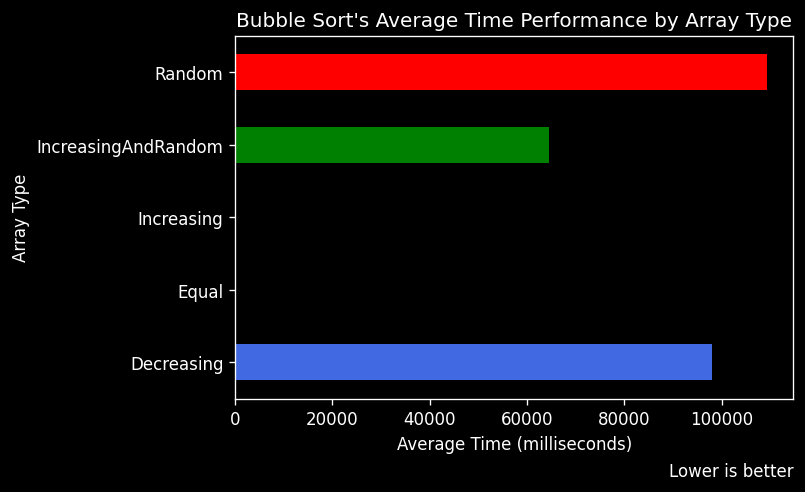

In [24]:
plot_average_time_chart(bubble, "ArrayType")
plt.title("Bubble Sort's Average Time Performance by Array Type")
plt.ylabel("Array Type")
plt.xlabel("Average Time (milliseconds)")

Text(0.5, 0, 'Average Time (milliseconds)')

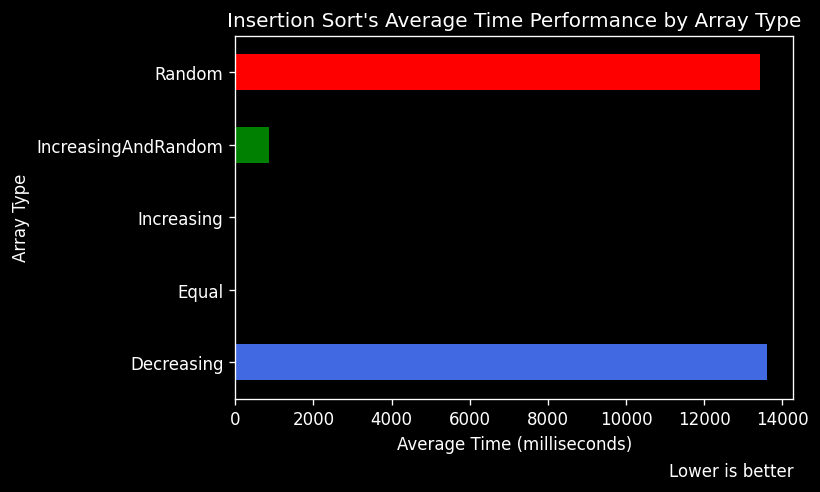

In [25]:
plot_average_time_chart(insertion, "ArrayType")
plt.title("Insertion Sort's Average Time Performance by Array Type")
plt.ylabel("Array Type")
plt.xlabel("Average Time (milliseconds)")

Text(0.5, 0, 'Average Time (milliseconds)')

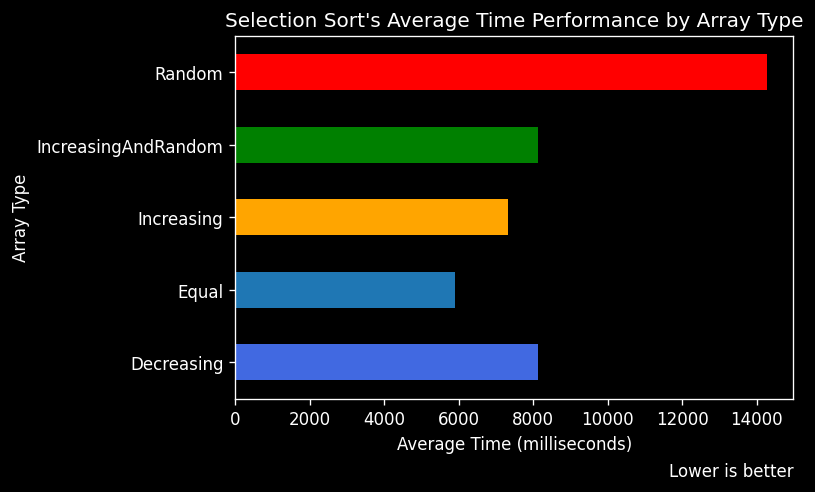

In [26]:
plot_average_time_chart(selection, "ArrayType")
plt.title("Selection Sort's Average Time Performance by Array Type")
plt.ylabel("Array Type")
plt.xlabel("Average Time (milliseconds)")

As you might have noticed, bubble and insertion sort performed particularly well with equal and increasing array types, yet selection sort not so much. There is a good reason for it. Due to the nature of bubble and insertion sort, it is possible to terminate the sorting operation as soon as the array has been sorted. In the case of bubble sort, for every iteration, the algorithm keeps track if a swap occurred, and if not, it means the array is sorted and the algorithm terminates immediately. The same is true of insertion sort.

Moreover, insertion sort performed considerably better than selection sort with sorted and mostly sorted arrays. But selection sort did better than insertion sort with decreasing arrays. Both of their performance was comparable with random array types.

Text(0.5, 0, 'Average Time (milliseconds)')

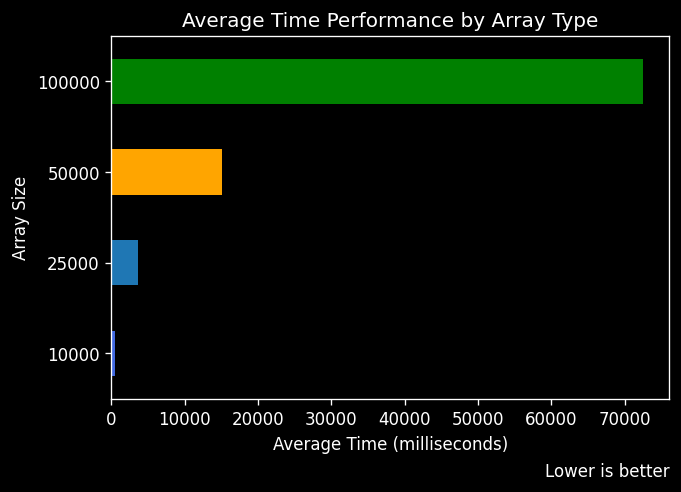

In [27]:
plot_average_time_chart(tests, "ArraySize")
plt.title("Average Time Performance by Array Type")
plt.ylabel("Array Size")
plt.xlabel("Average Time (milliseconds)")

On average, the time complexity of all three sorting algorithms can be described with N². The time it takes to sort a data structure increases exponentially with the size of the data.

The results of this analysis demonstrated that despite all three algorithms sharing the same time complexity, their performance varies considerably depending on the order of the data. Each algorithm has strengths and weaknesses, and although, on average, their performed can be explained by N², it is possible to get lower average times by taking into consideration each algorithm strength and weakness as illustrated by the bar charts.

### Best Overall Performance
By taking the the mean of all the averages, we can figure out which algorithm had the best overall performance.

In [28]:
tests.groupby("SortType").mean()["AverageTime"]

SortType
BubbleSort       54326.305677
InsertionSort     5574.331951
SelectionSort     8750.436439
Name: AverageTime, dtype: float64

In [29]:
def taverage(index):
    """
    Index correspondance:
        0 - Bubble Sort
        1 - Insertion Sort
        2 - Selection Sort
    """
    return tests.groupby("SortType").mean()["AverageTime"][index]

In [30]:
print("On average, all tests considered:")
print("Insertion sort was %.1fx faster than bubble sort." %(taverage(0) / taverage(1)))
print("Insertion sort was %.1fx faster than selection sort." %(taverage(2) / taverage(1)))
print("Selection sort was %.1fx faster than bubble sort." %(taverage(0) / taverage(2)))

On average, all tests considered:
Insertion sort was 9.7x faster than bubble sort.
Insertion sort was 1.6x faster than selection sort.
Selection sort was 6.2x faster than bubble sort.
